# Random Forest

## 1. Introduction
Credit classification is one of the popular classification problems encountered by financial institutions. For example, when customers applies for a loan, financial institutions such as banks would like to predict the probability of default. In this section, we will be using the german credit rating dataset provided by German Government. The data contains several attributes of persons who availed the credit.

In this project, we will do Exploratory data analysis and we will build ``Random Forest`` model to see class probability.

## 2. Feature Description

In [131]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import math
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE,ADASYN
import seaborn as sns
# Load Data 
data1 = pd.read_csv("data/german_credit.csv")
data1.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


Categorical Variables:
- ``Account Balance``: No account (1), None (No balance) (2), Below 200 DM (3), 200 DM or Above (4)
- ``Payment Status``: Delayed (0), Other Credits (1), Paid Up (2), No Problems (in this bank) (3), Previous Credits Paid (4)
- ``Savings/Stock Value``: None (1), Below 100 DM (2), [100, 500) DM (3), [500,1000) DM (4), Above 1000 DM (5)
- ``Employment Length``: None (1), Below 1 year (2) , [1, 4) (3) , [4, 7) (4), Above 7 (5)
- ``Installments %``: Above 35% (1), [25%,35%) (2), [20%,25%) (3), Below 20% (4)
- ``Occupation``: Unemployed, unskilled (1), Unskilled Permanent Resident (2), Skilled (3), Executive (4)
- ``Sex/Marital Status``: Male Divorced (1), Male Single (2), Male Married/Widowed (3), Female (4)
- ``No of Credits at this bank``: 1 (1), 2 or 3 (2), 4 or 5 (3), Above 6 (4)
- ``Guarantor``: None (1), Co - applicant (2), Guarantor (3)
- ``Concurrent Credits``: Other Banks (1), Dept Stores (2), None (3)
- ``Foreign Worker``: Yes (1), No (2)
- ``Purpose of Credit``: New car (1), Used car (2), Furniture (3), Radio/TV (4), Appliances (5), Repair (6), Education (7), Vacation (8), Retraining (9), Business (10), Other (0) 
- ``Type of Apartment``: Free (1), Rented (2), Owned (3)
- ``Most Valuable Asset``: None (1), Car (2), Life Insurance (3), Real Estate (4)
- ``No. of Departments``: 3 or More	(1), Less than 3 (2)
- ``Telephone``: Yes (1), No (2)

Continuous Variables: 
- ``Duration of Credit (Month)``
- ``Amount of Credit (DM)``
- ``Age (of Appicant)``

## 3. Exploratory data analysis

In [132]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [133]:
data1.shape

(1000, 21)

In [134]:
data1.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [135]:
# Checking the missing values values for customer data
print(data1.isnull().sum())

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64


Creditability
1    700
0    300
Name: count, dtype: int64


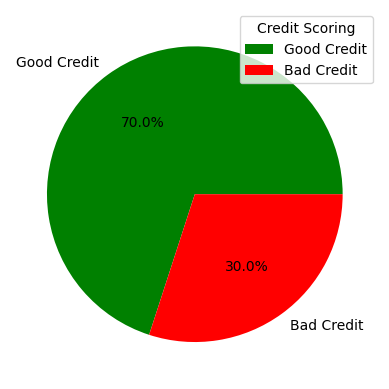

In [136]:
print(data1["Creditability"].value_counts())
#Visualising the label column
plt.pie(data1["Creditability"].value_counts(),labels = ["Good Credit", "Bad Credit"],colors =["green","red"], autopct = '%1.1f%%',radius = 1)
plt.legend(title= "Credit Scoring")
plt.show()

label is 1, the customer is in good credit , label is 0, the customer is in bad credit. The data is ``imbalance`` as we have more good credit than bad credit (7:3)



In [137]:
data1.nunique()

Creditability                          2
Account Balance                        4
Duration of Credit (month)            33
Payment Status of Previous Credit      5
Purpose                               10
Credit Amount                        923
Value Savings/Stocks                   5
Length of current employment           5
Instalment per cent                    4
Sex & Marital Status                   4
Guarantors                             3
Duration in Current address            4
Most valuable available asset          4
Age (years)                           53
Concurrent Credits                     3
Type of apartment                      3
No of Credits at this Bank             4
Occupation                             4
No of dependents                       2
Telephone                              2
Foreign Worker                         2
dtype: int64

Distribution of the continuous variables

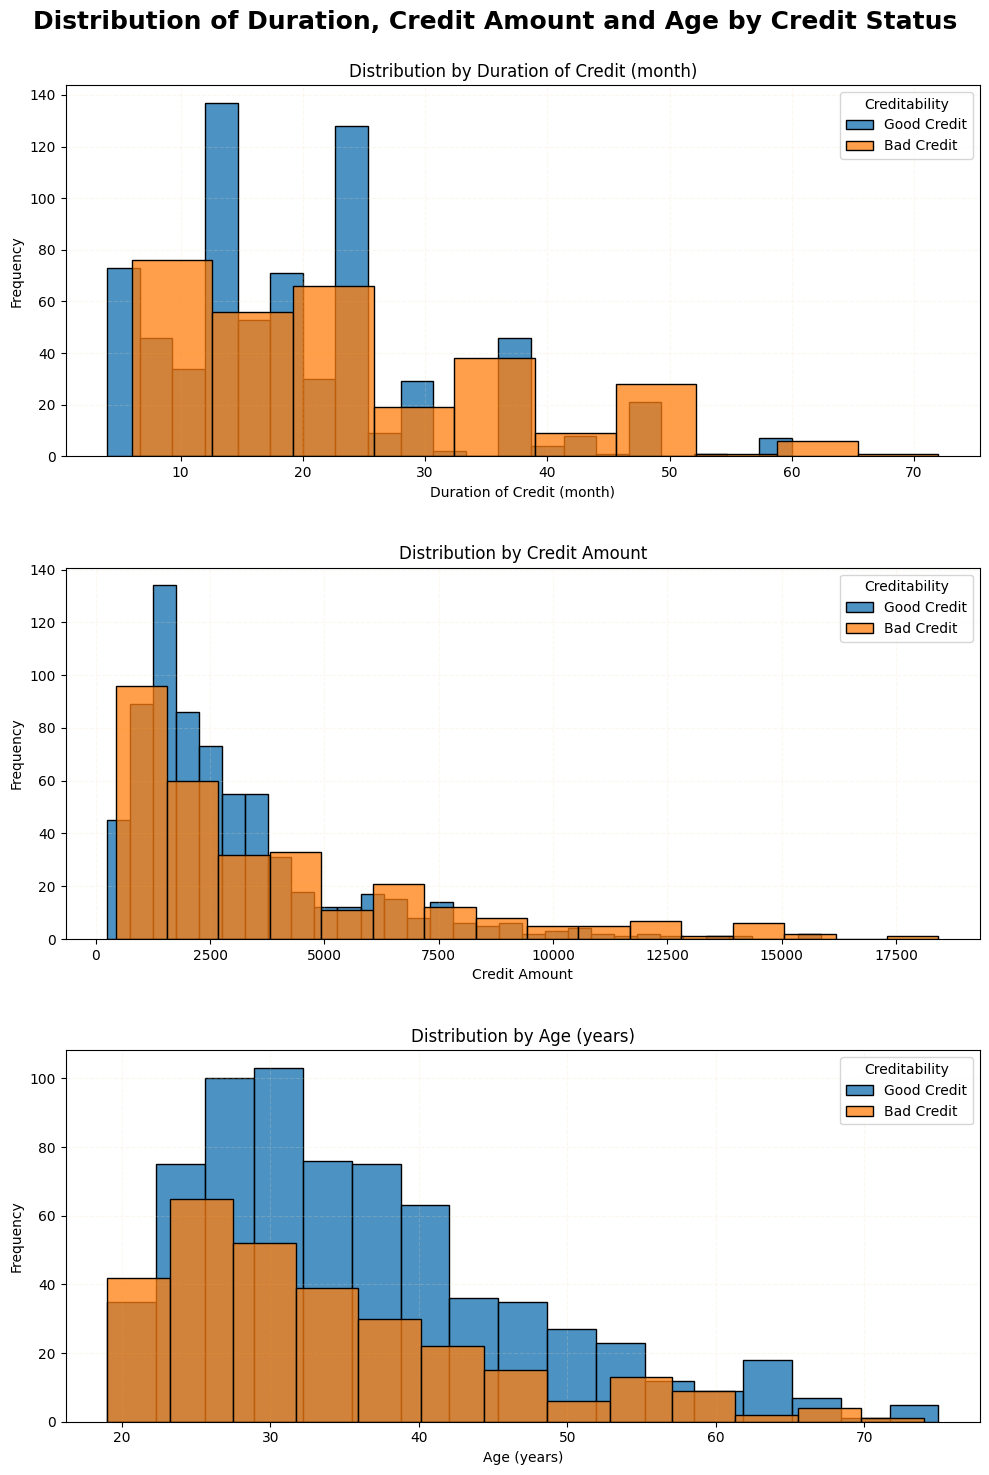

In [138]:
cont_num_col = ["Duration of Credit (month)","Credit Amount","Age (years)"]
fig, ax = plt.subplots(3, figsize=(10,15))
for idx, col in enumerate(cont_num_col):
    sns.histplot(data1[data1['Creditability'] == 1][col],
                 kde=False, 
                 label='Good Credit', 
                 ax=ax[idx],alpha =.8,zorder = 1)
    sns.histplot(data1[data1['Creditability'] == 0][col],
                 kde=False, 
                 label='Bad Credit', 
                 ax=ax[idx],zorder =2)
    ax[idx].legend(title='Creditability')
    ax[idx].set_xlabel(col)
    ax[idx].set_ylabel("Frequency")
    ax[idx].grid(visible=True, 
                 color='wheat', 
                 linestyle='--',zorder =0,alpha = 0.2)
    ax[idx].set_title("Distribution by {}".format(col))
plt.suptitle("Distribution of Duration, Credit Amount and Age by Credit Status", 
             fontsize=18, 
             fontweight='bold')
fig.tight_layout()
fig.subplots_adjust(top = 0.93,hspace = 0.3)
plt.show()


Since most of the predictors are categorical with several levels, the full cross-classification of all variables will lead to zero observations in many cells. Hence we need to reduce the table size. 
Depending on the cell proportions, two or more cells are merged for several categorical predictors and transform a continuous-valued variable into a discrete one by creating a set of contiguous intervals (or equivalently a set of cutpoints) that spans the range of the variable’s values (``Discretization``). We present below the final classification for the predictors that may potentially have any influence on Creditability:

Categorical Variables:

- ``Account Balance``: No account (1), None (No balance) (2), Some Balance (3)
- ``Payment Status``: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)
- ``Savings/Stock Value``: None (1), Below 100 DM (2), $[100, 1000]$ DM (3), Above 1000 DM (4)
- ``Employment Length``: Below 1 year (including unemployed) (1) , [1, 4) (2) , [4, 7) (3), Above 7 (4)
- ``Installments %``: Above 35% (1), $[25,35)$ (2), $[20,25)$ (3), Below 20% (4)
- ``Occupation``: Unemployed/unskilled (1), Skilled (2), Executive (3)
- ``Sex/Marital Status``: Male Divorced/Single (1), Male Married/Widowed (2), Female (3)
- ``No of Credits at this bank``: 1 (1), More than 1 (2)
- ``Guarantor``: None (1), Yes (2)
- ``Concurrent Credits``: Other Banks or Dept Stores (1), None (2)
- ``ForeignWorker variable``: Yes (1), No (2)
- ``Purpose of Credit``: New car (1), Used car (2), Home Related (3), Other (4)
- ``Type of Apartment``: Free (1), Rented (2), Owned (3)
- ``Most Valuable Asset``: None (1), Car (2), Life Insurance (3), Real Estate (4)
- ``No. of Departments``: 3 or More (1), Less than 3 (2)
- ``Telephone``: Yes (1), No (2)

Continuous Variables:
- ``Duration in months``: $[0,6]$, $(6,12]$, $(12,18]$, $(18,24]$, $(24,30]$, $(30,36]$, $(36,42]$, $(42,48]$, $(48,54]$, $(54,\infty)$
- ``Amount of credit in DM``: $(0,500]$, $(500,1000]$, $(1000,1500]$, $(1500,2500]$, $(2500,5000]$, $(5000,7500]$, $(7500,10000]$, $(10000,15000]$, $(15000,20000]$, $(20000,\infty)$
- ``Age in years``: $(0,25]$, $(25,39]$, $(39,59]$, $(59,64]$, $(65,\infty)$


In [139]:
# Function to replace values in specified columns
def replace_values(df, col_replacements):
    for col, replacements in col_replacements.items():
        df[col] = df[col].replace(replacements)
    return df

# Dictionary specifying the columns and their replacement values
col_replacements = {
    'Account Balance': {4: 3},
    'Payment Status of Previous Credit': {0: 1, 4: 3},
    'Value Savings/Stocks': {4: 3, 5: 4},
    'Length of current employment': {2: 1, 3: 2, 4: 3, 5: 4},
    'Occupation': {2: 1, 3: 2, 4: 3},
    'Sex & Marital Status': {2: 1, 3: 2, 4: 3},
    'No of Credits at this Bank': {3: 2, 4: 2},
    'Guarantors': {3: 2},
    'Concurrent Credits': {2: 1, 3: 2},
    'Purpose': {**{i: 3 for i in range(4, 7)}, **{j: 0 for j in range(7, 11)}}
}

# Apply replacements
data1 = replace_values(data1, col_replacements)

# Function to discretize continuous variables
def discretize_column(df, col, bins, labels):
    df[col] = pd.cut(df[col], bins=bins, labels=labels, right=False)
    return df

# Bins and labels for discretization
bins_labels = {
    'Duration of Credit (month)': {
        'bins': [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, float('inf')],
        'labels': [str(i) for i in range(1,11)]
    },
    'Credit Amount': {
        'bins': [0, 500, 1000, 1500, 2500, 5000, 7500, 10000, 15000, 20000, float('inf')],
        'labels': [str(i) for i in range(1,11)]
    },
    'Age (years)': {
        'bins': [0, 26, 40, 60, 65, float('inf')],
        'labels': [str(i) for i in range(1, 6)]
    }
}

# Apply discretization
for col, bl in bins_labels.items():
    data1 = discretize_column(data1, col, bl['bins'], bl['labels'])
print(pd.DataFrame(data1))


     Creditability  Account Balance Duration of Credit (month)  \
0                1                1                          4   
1                1                1                          2   
2                1                2                          3   
3                1                1                          3   
4                1                1                          3   
..             ...              ...                        ...   
995              0                1                          5   
996              0                1                          5   
997              0                3                          4   
998              0                2                          3   
999              0                1                          6   

     Payment Status of Previous Credit  Purpose Credit Amount  \
0                                    3        2             3   
1                                    3        0             5   
2           

In [140]:
data1.nunique()

Creditability                         2
Account Balance                       3
Duration of Credit (month)           10
Payment Status of Previous Credit     3
Purpose                               4
Credit Amount                         9
Value Savings/Stocks                  4
Length of current employment          4
Instalment per cent                   4
Sex & Marital Status                  3
Guarantors                            2
Duration in Current address           4
Most valuable available asset         4
Age (years)                           5
Concurrent Credits                    2
Type of apartment                     3
No of Credits at this Bank            2
Occupation                            3
No of dependents                      2
Telephone                             2
Foreign Worker                        2
dtype: int64

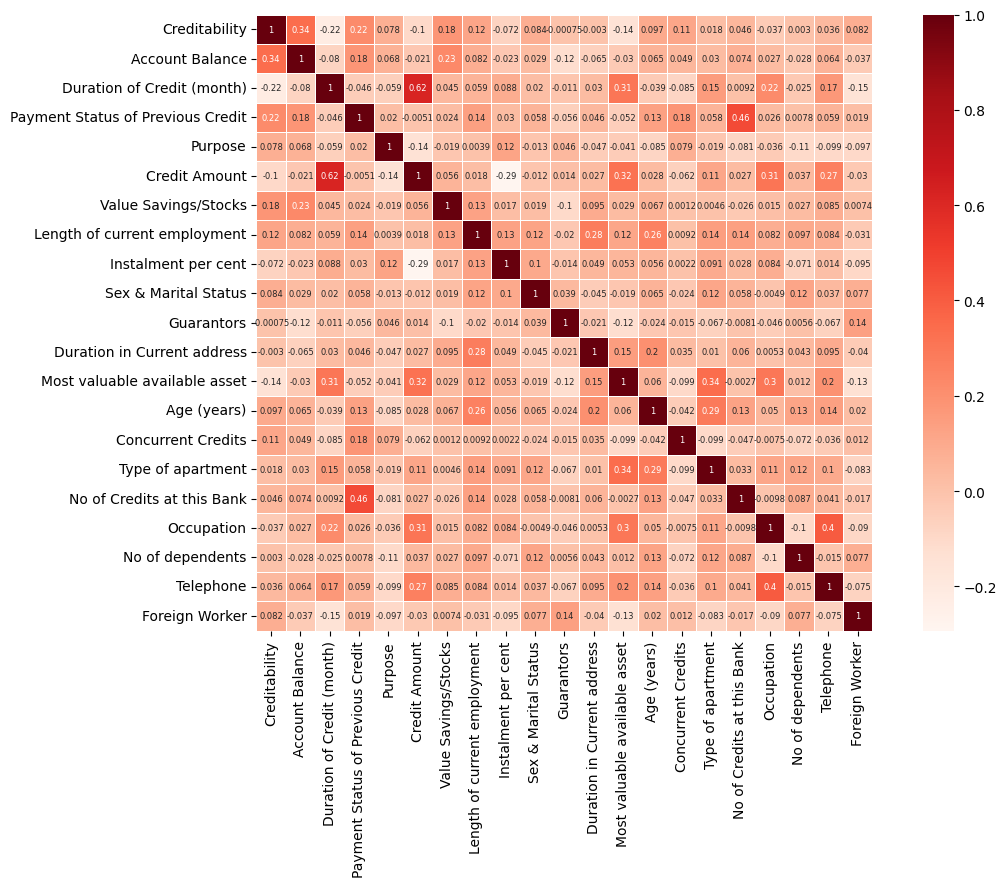

In [141]:
#Correlation Matrix 
correlation_matrix = data1.corr()
fig = plt.figure(figsize=(13,8))
heatmap=sns.heatmap(correlation_matrix,annot = True,square= True, linewidths=.5,cmap=plt.cm.Reds,annot_kws={"size":6}) 
plt.show()

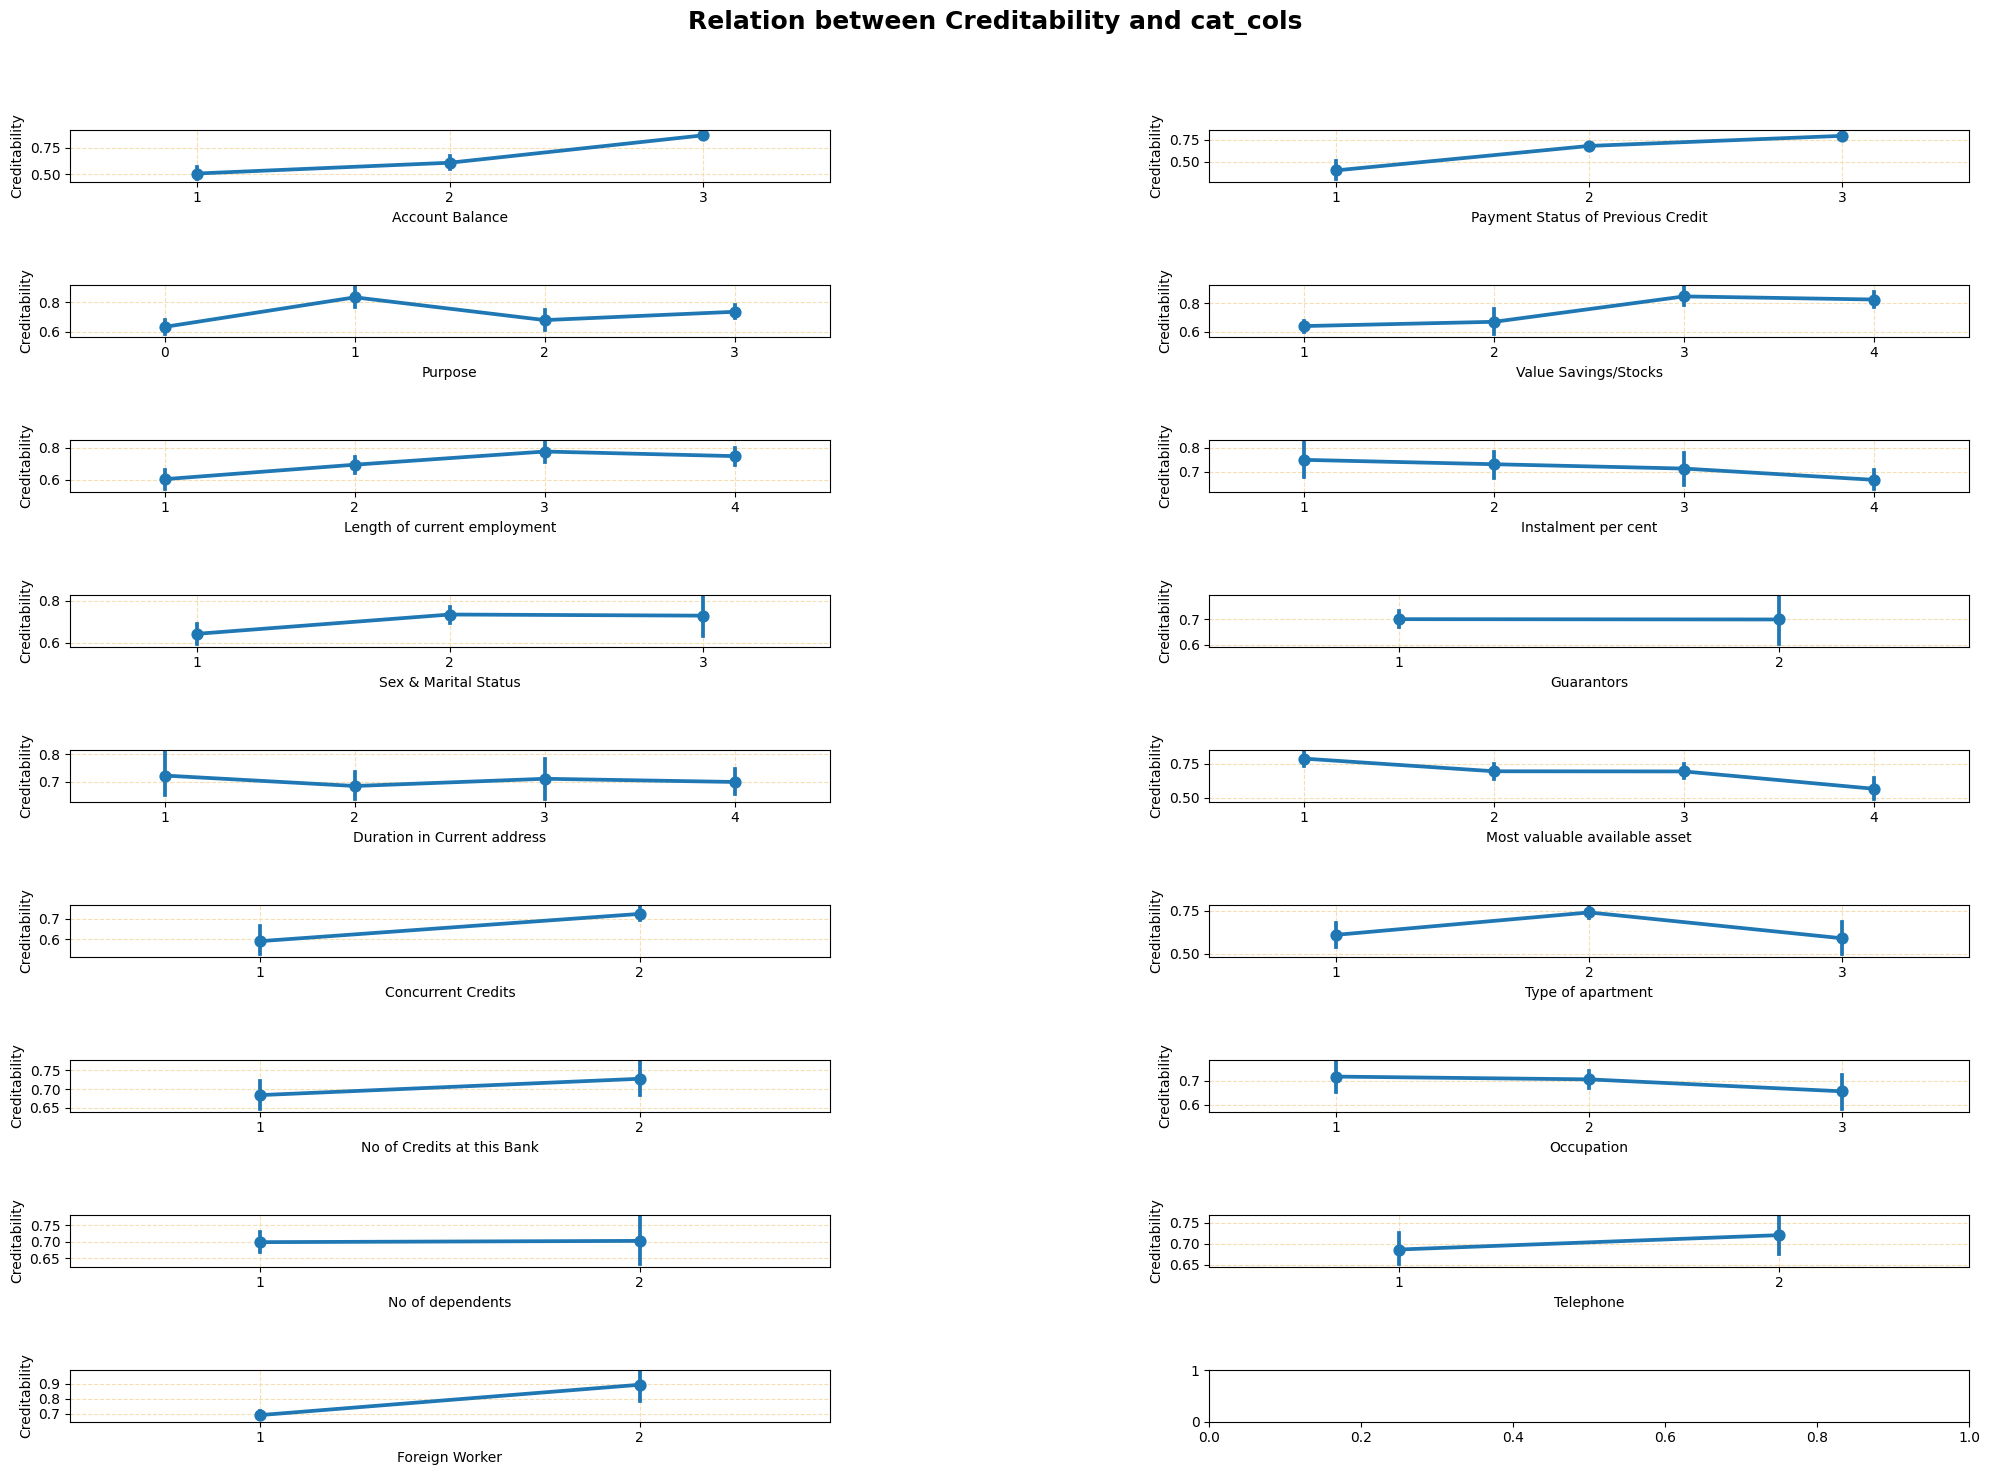

In [142]:
cat_cols = data1.columns.drop(cont_num_col+['Creditability'])
fig, ax = plt.subplots(9,2,figsize = (20,15))
for i, feat in enumerate(cat_cols):
    sns.pointplot(x=feat, y = 'Creditability', data = data1, ax = ax[i//2,i%2])
    ax[i//2,i%2].grid(visible = True,linestyle = '--',color = 'wheat')
plt.suptitle("Relation between Creditability and cat_cols",fontsize =18, fontweight = 'bold')
plt.tight_layout()
plt.subplots_adjust(hspace = 2,wspace=0.5, top = 0.9)
plt.show()


From the above heatmap, we can see that there are four features with low correlation to Creditability: ['Foreign Worker', 'No of dependents', 'Guarantors', 'Duration in Current address']. Therefore, we will drop them.

In [143]:
remove_cols = ['Foreign Worker', 'No of dependents', 'Guarantors','Duration in Current address']
data = data1.copy()
data.drop(remove_cols,inplace= True, axis =1)

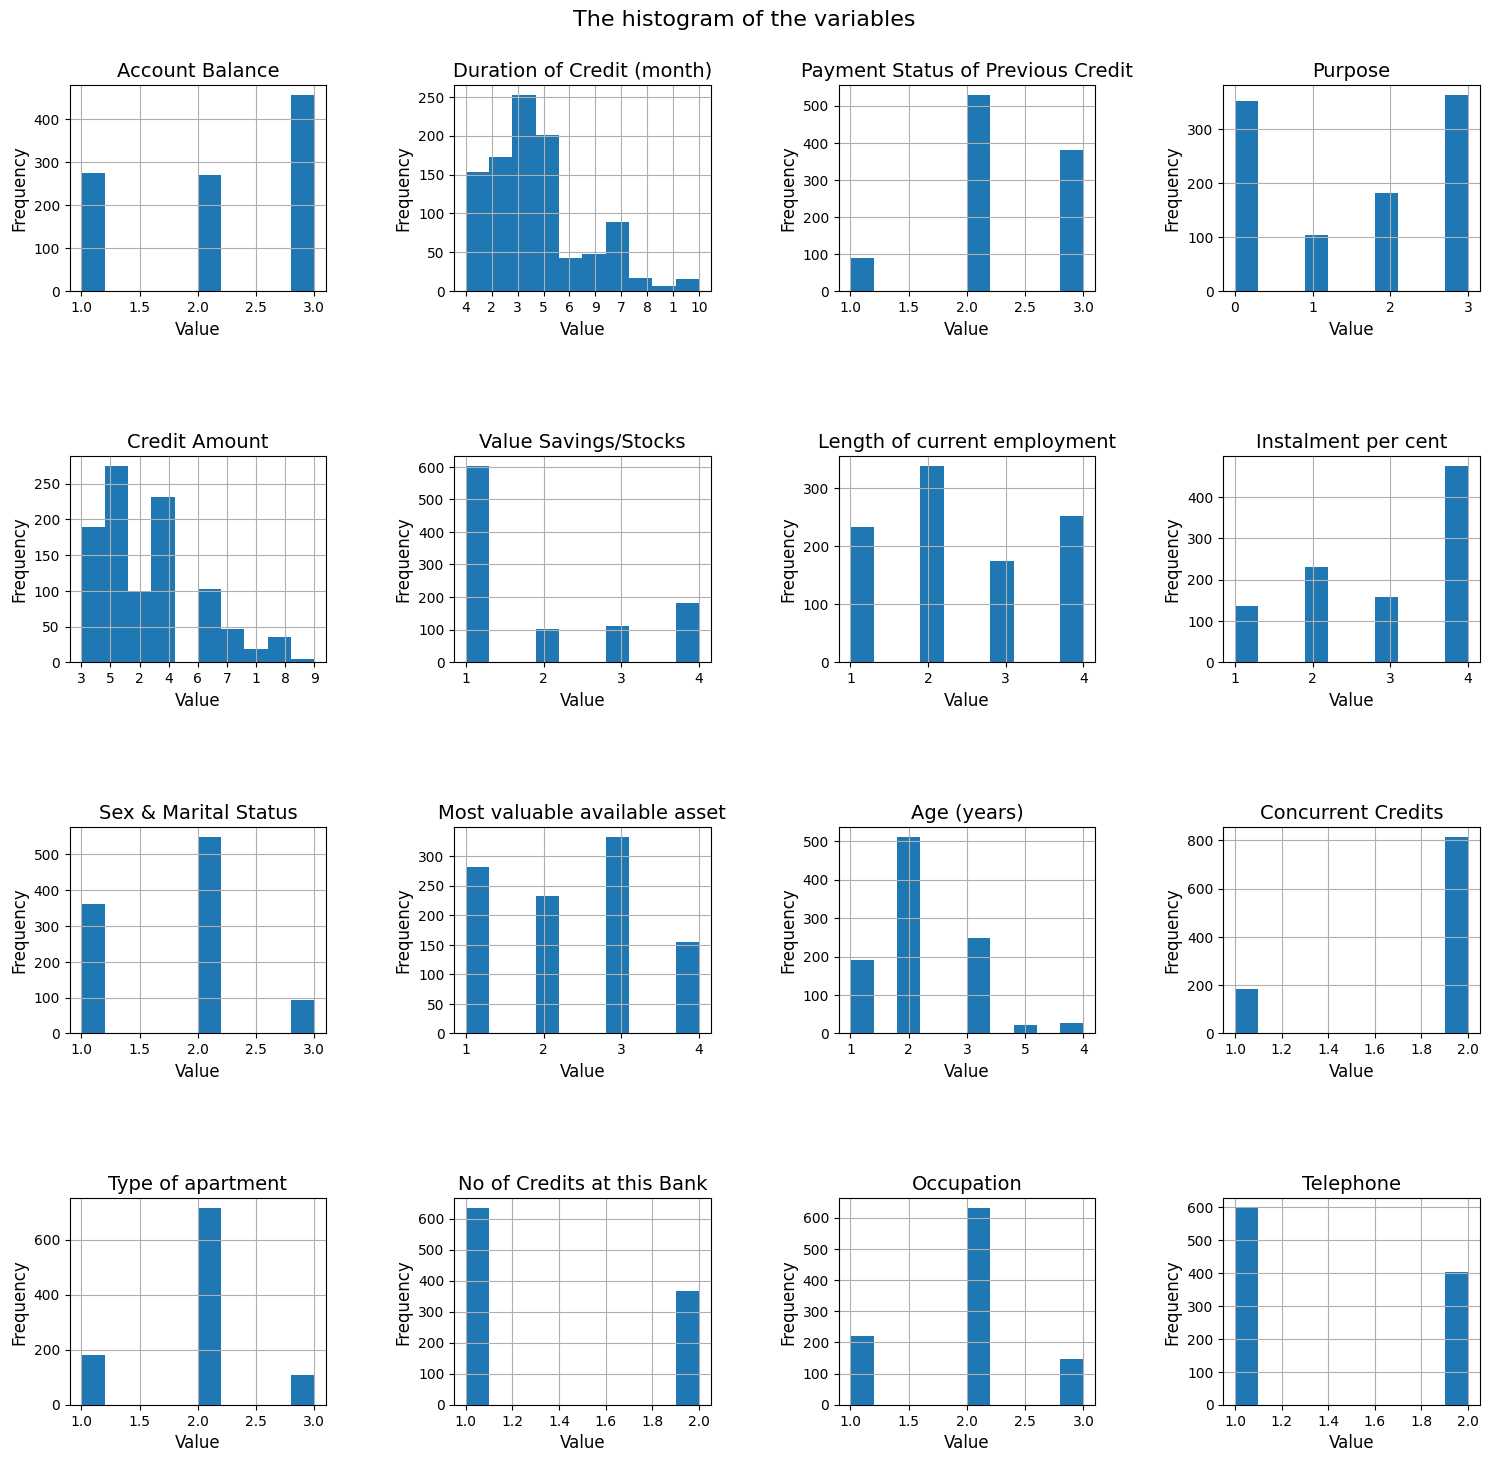

In [144]:
features = list(data.columns[1:])
num_features = len(features)
grid_size = math.ceil(num_features**0.5)
fig, axs = plt.subplots(grid_size,grid_size,figsize = (15,15))
axs = axs.flatten()
fig.suptitle("The histogram of the variables",fontsize = 16)
for i, feat in enumerate(features): 
    axs[i].hist(data[feat],bins = 10)
    axs[i].set_xlabel("Value", fontsize = 12)
    axs[i].set_ylabel("Frequency", fontsize = 12)
    axs[i].set_title(feat, fontsize = 14)
    axs[i].grid(True)
#Remove empty plots
for j in range(i+1,len(axs)):
    fig.delaxes(axs[j])
#Adjust the distances so that there is no overlap appear here
plt.tight_layout()
plt.subplots_adjust(left=0.05, top=0.93, bottom=0.05, wspace=0.5, hspace=0.8)
plt.show()

## 4. Modelling

### 4.1. Balancing the dataset

In [145]:
#Features and Label of Data
x = data.iloc[:,1:].values
y = data.iloc[:,0]
#Balancing the dataset
ada = ADASYN(random_state=15)


### 4.2. Hyper Tuning

In [146]:
#GridSreach -> Hyper Tuning
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=2/3)
x_train_res, y_train_res = ada.fit_resample(x_train,y_train)
# use a full grid over all parameters
param_grid = {"max_depth": [2,3,5, None],
            "n_estimators":[50,100,200,300,400,500],
            "max_features": [1, 3, 10],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "bootstrap": [True, False],
            "criterion": ["gini", "entropy"]}
forest_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                param_grid = param_grid,   
                scoring="roc_auc",  #metrics
                cv = 5,              #cross-validation
                verbose= 1,
                refit = True,
                n_jobs = -1)          #number of core

forest_grid.fit(x_train_res,y_train_res) #fit
forest_grid_best = forest_grid.best_estimator_ #best estimator
print("Best Model Parameter: ",forest_grid.best_params_)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
Best Model Parameter:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 400}


### 4.3. Training

In [156]:
#Create Stratified K-fold Object
skf = RepeatedStratifiedKFold(n_splits = 10 , random_state=1)

conf_matrices = []
precision_list = []
recall_list = []
f1_list = []
tprs = []
aucs = []
mean_fprs = np.linspace(0,1,100)
true_positive_prob = []
false_positive_prob = []

for train_index, test_index in tqdm(skf.split(x,y)):
    
    x_train, x_test = x[train_index],x[test_index]
    y_train, y_test = y[train_index],y[test_index]
    x_train,y_train = ada.fit_resample(x_train,y_train)

    rf = RandomForestClassifier(n_estimators=500,criterion="gini",max_features=1, min_samples_leaf=1,min_samples_split=2,n_jobs=-1, max_depth = None, bootstrap = False)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    
    #Confusion Matrix 
    conf_matrix = confusion_matrix(y_test,y_pred)
    conf_matrices.append(conf_matrix)

    #Classification reports
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])

    # Probabilities for ROC Curve
    y_pred_proba = rf.predict_proba(x_test)[:,1]

    # Compute ROC curve and area the curve
    fpr,tpr,thres = roc_curve(y_test,y_pred_proba)
    aucs.append(auc(fpr,tpr))
    tprs.append(np.interp(mean_fprs,fpr,tpr))
    tprs[-1][0] = 0.0

    # Collect probabilities for true positive prob and false positive prob
    true_positive_prob.extend(y_pred_proba[y_test == 1])
    false_positive_prob.extend(y_pred_proba[y_test == 0]
)

100it [00:59,  1.68it/s]


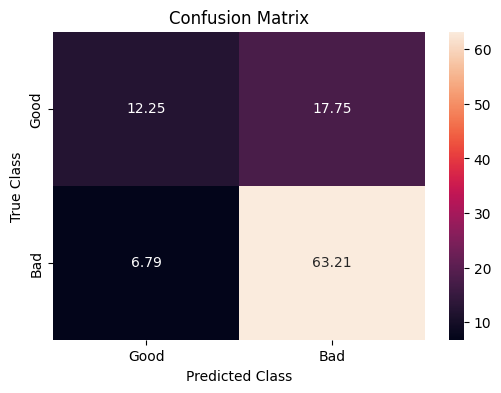

In [157]:
#Mean of confusion Matrix
mean_conf_matrix = np.mean(conf_matrices,axis =0)
labels = ["Good","Bad"]

plt.figure(figsize=(6,4))
sns.heatmap(mean_conf_matrix, xticklabels=labels, yticklabels=labels,annot = True, fmt = 'g')
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.tight_layout
plt.show()

In [160]:
#Run classification metrics 
print("Average Precision: {:.4f}".format(np.mean(precision_list)))
print("Average Recall: {:.4f}".format(np.mean(recall_list)))
print("Average F1-score: {:.4f}".format(np.mean(f1_list)))

Average Precision: 0.7417
Average Recall: 0.7546
Average F1-score: 0.7352


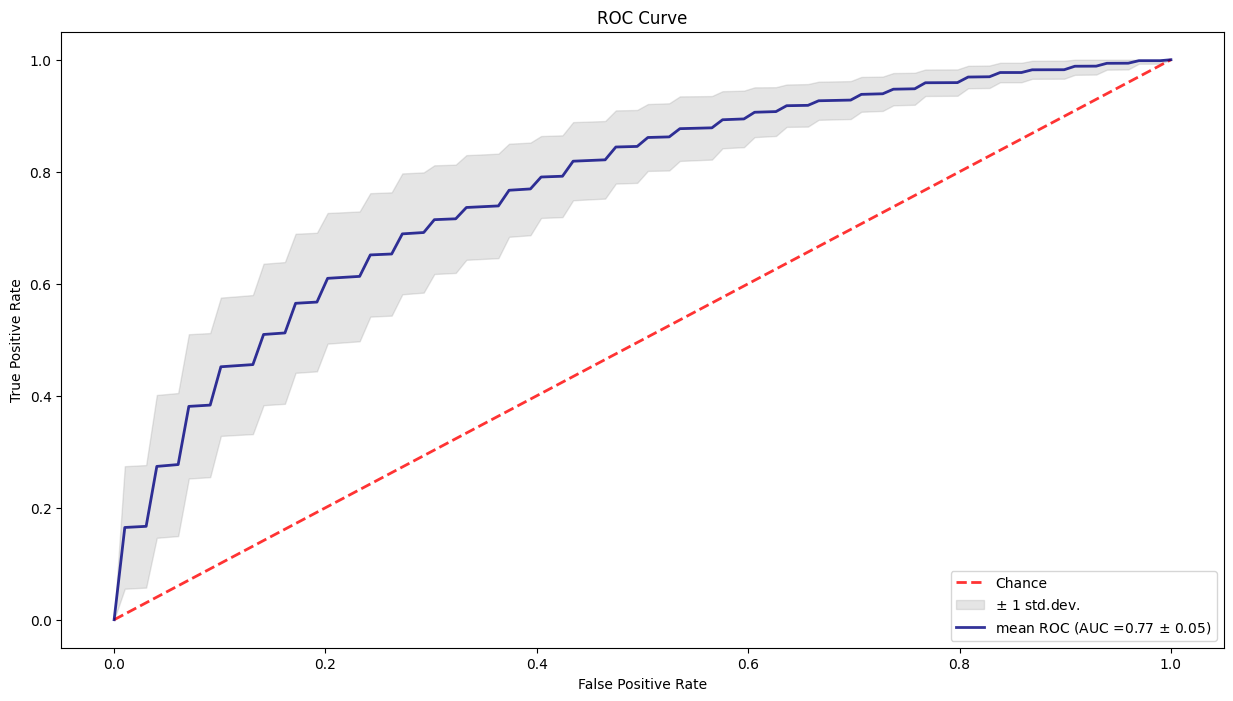

In [162]:
#Plot AUROC
plt.figure(figsize = (15,8))
plt.plot([0,1],[0,1],linestyle ="--",color= 'red',lw = 2,label = 'Chance',alpha = .8)
mean_tprs = np.mean(tprs, axis = 0)
mean_auc = auc(mean_fprs, mean_tprs)
std_auc = np.std(aucs)
std_tpr = np.std(tprs,axis = 0)
tprs_upper = np.minimum(mean_tprs + std_tpr, 1)
tprs_lower = np.maximum(mean_tprs - std_tpr,0)
plt.fill_between(mean_fprs,tprs_upper,tprs_lower,color = 'grey', alpha = .2, label = r'$\pm$ 1 std.dev.')

mean_tprs[-1] = 1
plt.plot(mean_fprs, mean_tprs, lw = 2, alpha =.8,color = 'navy',label =r'mean ROC (AUC ={:.2f} $\pm$ {:.2f})'.format(mean_auc,std_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "lower right" )
plt.show()

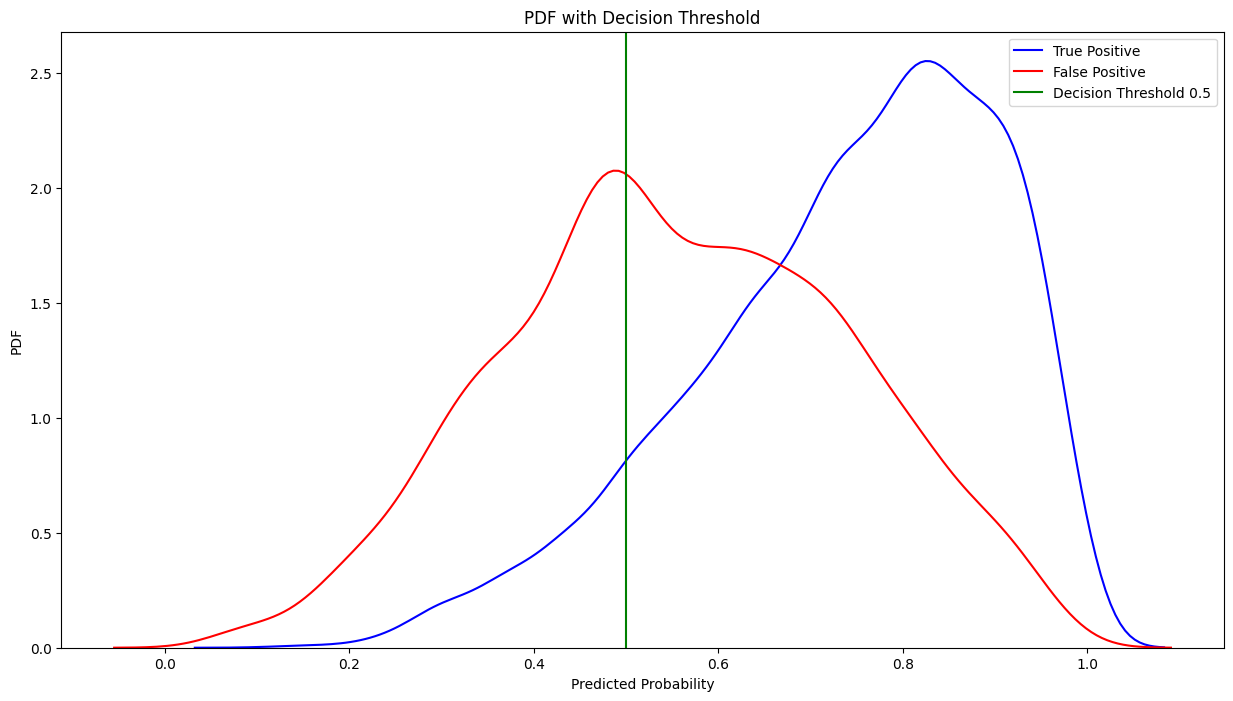

In [163]:
#Plot PDF with Decision Threshold
plt.figure(figsize = (15,8))
sns.kdeplot(true_positive_prob, label = 'True Positive', color = 'b')
sns.kdeplot(false_positive_prob, label = 'False Positive', color = 'r')
decision_threshold = 0.5
plt.axvline(x = decision_threshold, color = 'g', label = f'Decision Threshold {decision_threshold}') 
plt.xlabel("Predicted Probability")
plt.ylabel("PDF")
plt.title("PDF with Decision Threshold")
plt.legend(loc = "upper right")
plt.show()